In [3]:
import os

In [81]:
import pandas as pd 
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [72]:
from sklearn.metrics.pairwise import cosine_similarity
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

# open data
---

In [7]:
os.listdir("./dataSet")

['genome_scores.csv',
 'genome_tags.csv',
 'link.csv',
 'movie.csv',
 'rating.csv',
 'tag.csv']

## movie 

In [20]:
data_movie = pd.read_csv("./dataSet/movie.csv")

In [21]:
data_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


## rating

In [22]:
data_rating = pd.read_csv("./dataSet/rating.csv")

In [23]:
data_rating

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


user가 너무 많으므로 1000명으로 줄임 

In [48]:
data_rating_small = data_rating[data_rating['userId']<=1000]

In [49]:
data_rating_small

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
150624,1000,88125,5.0,2012-01-03 00:53:12
150625,1000,88140,4.0,2012-01-03 00:53:51
150626,1000,88744,5.0,2012-01-03 00:53:47
150627,1000,90603,4.5,2012-01-03 00:53:28


## 다른 데이터셋 link id

In [24]:
data_link = pd.read_csv("./dataSet/link.csv")

In [25]:
data_link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
27273,131254,466713,4436.0
27274,131256,277703,9274.0
27275,131258,3485166,285213.0
27276,131260,249110,32099.0


---

# making rating matrix 

In [269]:
merges = pd.merge(data_rating_small,data_movie,on="movieId",how="left")

In [270]:
merges

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
150624,1000,88125,5.0,2012-01-03 00:53:12,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
150625,1000,88140,4.0,2012-01-03 00:53:51,Captain America: The First Avenger (2011),Action|Adventure|Sci-Fi|Thriller|War
150626,1000,88744,5.0,2012-01-03 00:53:47,Rise of the Planet of the Apes (2011),Action|Drama|Sci-Fi|Thriller
150627,1000,90603,4.5,2012-01-03 00:53:28,Batman: Year One (2011),Action|Animation|Crime


In [271]:
merges.drop("timestamp",axis=1,inplace=True)

In [272]:
merges

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
150624,1000,88125,5.0,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
150625,1000,88140,4.0,Captain America: The First Avenger (2011),Action|Adventure|Sci-Fi|Thriller|War
150626,1000,88744,5.0,Rise of the Planet of the Apes (2011),Action|Drama|Sci-Fi|Thriller
150627,1000,90603,4.5,Batman: Year One (2011),Action|Animation|Crime


In [273]:
rating_matrix= merges.pivot_table('rating', index = 'title', columns='userId')

In [274]:
rating_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
title,,,,,,,,,,,,,,,,,,,,,
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Neath the Arizona Skies (1934),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\\""Great Performances\""\"" Cats (1998)""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
rating_matrix = rating_matrix.fillna(0)

In [276]:
rating_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
title,,,,,,,,,,,,,,,,,,,,,
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\\""Great Performances\""\"" Cats (1998)""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## item based

In [103]:
sim_item = cosine_similarity(rating_matrix)

In [104]:
sim_item

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.38700342,
        0.06454882],
       [0.        , 0.        , 0.        , ..., 0.38700342, 1.        ,
        0.04418598],
       [0.        , 0.        , 0.        , ..., 0.06454882, 0.04418598,
        1.        ]])

In [105]:
sim_item.shape

(9744, 9744)

In [84]:
mpl.rcParams['figure.dpi'] = 50
plt.rcParams["figure.figsize"] = (20,11)

### visualization

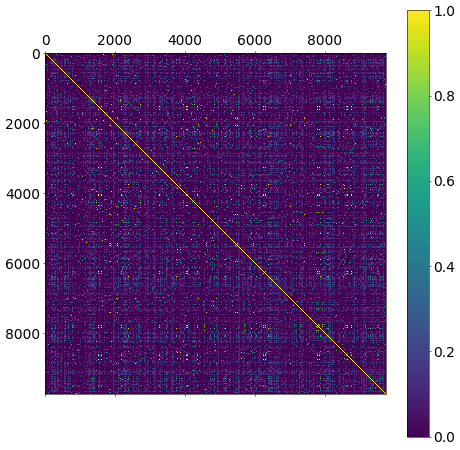

In [89]:
plt.matshow(sim_item)       
plt.colorbar()
plt.savefig('result/itemFiltering.png')

### order recommendation list 

In [180]:
title = rating_matrix.index.to_numpy()

In [181]:
title 

array(["'Hellboy': The Seeds of Creation (2004)",
       "'Neath the Arizona Skies (1934)", "'Round Midnight (1986)", ...,
       'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)'], dtype=object)

In [182]:
def orderList(t,N=10):
    title_index = np.where(title==t)[0][0]

    ar = sim_item[title_index]

    order_index = np.argsort(-ar)

    cnt = 1
    for i in order_index:
        if(cnt<=N):
            print(cnt,end="\t")
            print(i,end="\t")
            print(sim_item[title_index][i],end="\t")
            print(title[i])
            cnt+=1

In [183]:
orderList("Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979)")

1	1628	1.0	Cat o' Nine Tails, The (Gatto a nove code, Il) (1971)
2	8936	1.0	Trip, The (1967)
3	1010	1.0	Beyond Re-Animator (2003)
4	8010	1.0	Society (1989)
5	8021	1.0	Soldier, The (1982)
6	2204	1.0	Danger: Diabolik (Diabolik) (1968)
7	966	1.0	Benny's Video (1992)
8	9557	1.0	Witchfinder General (Conquerer Worm, The) (1968)
9	2142	1.0	Cul-de-sac (1966)
10	9004	1.0	Twelve and Holding (2005)


## user based 

###  Cosine similarity

In [277]:
sim_user = cosine_similarity(rating_matrix.T)

In [278]:
sim_user

array([[1.        , 0.10291644, 0.26119811, ..., 0.0777056 , 0.05154093,
        0.06913134],
       [0.10291644, 1.        , 0.18012391, ..., 0.09811959, 0.09600634,
        0.        ],
       [0.26119811, 0.18012391, 1.        , ..., 0.15851253, 0.0940309 ,
        0.04178447],
       ...,
       [0.0777056 , 0.09811959, 0.15851253, ..., 1.        , 0.0670662 ,
        0.00625846],
       [0.05154093, 0.09600634, 0.0940309 , ..., 0.0670662 , 1.        ,
        0.        ],
       [0.06913134, 0.        , 0.04178447, ..., 0.00625846, 0.        ,
        1.        ]])

###  Pearson similarity

- user id별 test sample 제작 

In [279]:
sim_user.shape

(1000, 1000)

In [280]:
# ppt와 xy축 반대
rating_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
title,,,,,,,,,,,,,,,,,,,,,
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\\""Great Performances\""\"" Cats (1998)""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
personId = 20

- 처리 편하게 하기위해서 (x축 -> id , y축 -> 영화 ) === ppt 그림 형식

In [282]:
rating_np = rating_matrix.to_numpy()

In [283]:
rating_np = rating_np.T

In [284]:
rating_np.shape

(1000, 9744)

In [286]:
for i in range(len(sim_user)):
    for j in range(len(rating_np[0])):
        rating_np[i][j] = rating_np[i][j]*sim_user[personId-1][i]

In [287]:
rating_np.shape

(1000, 9744)

- 다시 제자리로 

In [288]:
rating_np = rating_np.T

In [292]:
person_rating = pd.DataFrame(rating_np)

In [293]:
person_rating 

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9740,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9741,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9742,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [294]:
person_rating.index = rating_matrix.index

In [295]:
person_rating 

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
title,,,,,,,,,,,,,,,,,,,,,
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\\""Great Performances\""\"" Cats (1998)""",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
person_rating.columns = rating_matrix.columns

In [297]:
person_rating

userId,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
title,,,,,,,,,,,,,,,,,,,,,
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\\""Great Performances\""\"" Cats (1998)""",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- 값 바꼈는지 확인

In [262]:
ii = np.where(rating_np!=0)

In [285]:
rating_matrix.iloc[ii[0][0],ii[1][0]]

2.5

In [289]:
sim_user[personId-1][ii[1][0]]

0.054877485440364304

In [291]:
rating_np[ii[0][0]][ii[1][0]]

0.13719371360091076

In [298]:
person_rating.iloc[ii[0][0],ii[1][0]]

0.13719371360091076

- 최종 결과

In [300]:
movie_rating = pd.DataFrame(person_rating.sum(axis=1))

In [303]:
movie_rating.columns = [personId]

In [304]:
movie_rating

,20
title,
'Hellboy': The Seeds of Creation (2004),0.137194
'Neath the Arizona Skies (1934),0.000000
'Round Midnight (1986),0.000000
'Salem's Lot (2004),0.316626
'Til There Was You (1997),0.932736
...,...
"\\""Great Performances\""\"" Cats (1998)""",0.125710
eXistenZ (1999),15.799503
xXx (2002),8.413269


### order recommendation list

In [307]:
movie_rating.sort_values(by=[20],ascending=False)

,20
title,
Pulp Fiction (1994),164.171956
"Matrix, The (1999)",157.086046
"Shawshank Redemption, The (1994)",146.578877
"Silence of the Lambs, The (1991)",142.185982
Forrest Gump (1994),137.926438
...,...
Leap Year (2010),0.000000
"Living Dead Girl, The (Morte Vivante, La) (1982)",0.000000
All Quiet on the Western Front (1979),0.000000
